# Lab 9: Clustering 

In this lab, you will gain more experience with clustering. In particular, you will learn how to use two of the most popular clustering algorithms: Hierarchical Clustering and K-Means Clustering. Then, you will be asked to apply this knowledge on a document data set.

## Lab 9.A: Clustering Tutorial with Questions (50% of grade)

Let us start by importing the needed libraries. We will use sklearn library, which implements many of the most popular data science algorithms. We will be using this library often for the rest of this course. Please, take a moment to look at the sklearn documentation at: http://scikit-learn.org/stable/.

In [70]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from pandas import crosstab
from pandas.plotting import scatter_matrix
import pandas as pd
%matplotlib inline

Let us load the Iris data set and plot a scatter plot of the 2nd and 3rd attributes.

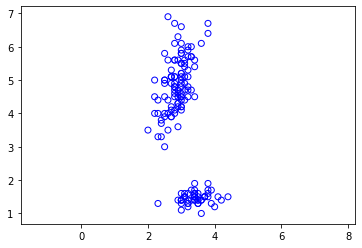

In [71]:
iris = datasets.load_iris()
d = iris.data
y = iris.target

plt.scatter(d[:,1],d[:,2],facecolors='none',color='blue')
plt.axis('equal');

In [128]:
d = iris.data
y = iris.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Hierarchical Clustering
Let us run the **hierarchical clustering** on the 2 columns of Iris. We will use only the first 20 rows. We'll call this new data set `dnew`.

In [72]:
A=range(0,20)
dnew = d[A,1:3]
# Build a dendrogram using single-linkage clustering and Euclidean distance
Z = hierarchy.linkage(dnew,method = 'single', metric = 'euclidean')
# Picks 2 clusters
cl = hierarchy.fcluster(Z, 2, criterion='maxclust')

Let us now plot the dendrogram. 

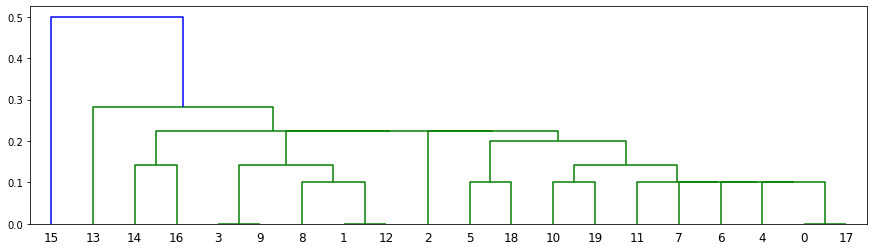

In [73]:
plt.figure(figsize = (15,4))
hierarchy.dendrogram(Z);

And, let us see the outcome of clustering

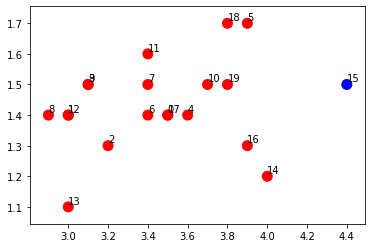

In [74]:
plt.figure()
colors=['red','blue']
plt.scatter(dnew[A,0],dnew[A,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
for i in A:
    plt.text(dnew[i,0],dnew[i,1]+0.01,s=str(i),size=10)

**Question 1**: Let us play with the clustering options
- Make 3 clusters. Discuss the result
- Use several different methods, other than 'single'. Try 'average' and one more of your choice. Discuss the result.
- Use a metric other than 'Eucliedean'. Discuss the result.

**Question 2**. Run the clustering on the whole Iris data set, using only 2nd and 3rd columns. Plot the results. Try to figure out which is the best number of clusters.

Each of the 150 flowers in Iris data set is labeled as one of 3 types of Irises. This information is in your variable `y`. Let us look at the cross-tabulation between the found clusters and the type of a flower:

**Answer 1:**

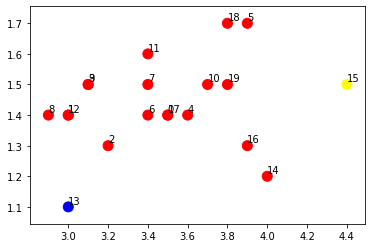

In [75]:
cl = hierarchy.fcluster(Z, 3, criterion='maxclust')
plt.figure()
colors=['red','blue', 'yellow']
plt.scatter(dnew[A,0] , dnew[A,1], c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
for i in A:
    plt.text(dnew[i,0],dnew[i,1]+0.01,s=str(i),size=10)

From observing the new scatterplot with 3 clusters, we can see that it's pretty similar to the graph with 2 clusters. However, the third cluster that is identified here is the blue dot at the bottom left corner. 

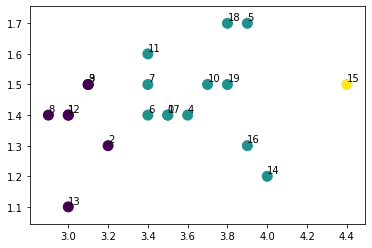

In [76]:
# I am going to create a function to make it easier to build clustering model

# df is the dataFrame that is used to create the scatterplot (preferably 2D)
def build_clustering_model(df, num_cluster, method = 'single', metric = 'euclidean', criterion = 'maxclust', \
                          cluster_graph = True, dendrogram = False):
    
    # Build a dendrogram using single-linkage clustering and Euclidean distance
    Z = hierarchy.linkage(df, method = method, metric = metric)
    
    # Picks num_cluster clusters
    cl = hierarchy.fcluster(Z, num_cluster, criterion = criterion)
    
    # Create graph to show clusters
    if cluster_graph:
        plt.figure()
        plt.scatter(df[A,0] , df[A,1], c=cl, s = 100, facecolors='none')
        for i in A:
            plt.text(df[i,0], df[i,1]+0.01,s=str(i),size=10)
            
    # Create Dendogram
    if dendrogram:
        plt.figure(figsize = (15,4))
        hierarchy.dendrogram(Z);
        
build_clustering_model(dnew, 3, method = 'average') 

As we can see above, I built a clustering model using average linkage and 3 clusters. When comparing this model to the one above (with single linkage and 3 clusters), we can see that the number of dots that are in each cluster for this model is more evenly distributed. While for the above model, the cluster in the middle contains almost all the dots (except for 2 in which each belongs to one of the other 2 clusters). 

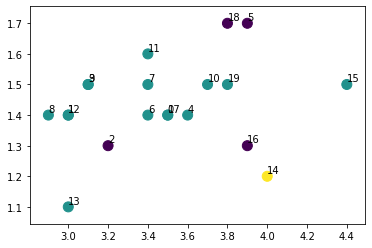

In [77]:
# According to https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
# for the possible values for the metric parameter, we should look at the pdist function
# so I found this source: http://www.ece.northwestern.edu/local-apps/matlabhelp/toolbox/stats/pdist.html
# which has a list of possible metrics
build_clustering_model(dnew, 3, method = 'average', metric = 'jaccard')

I was playing around with the metric parameters and came across Jaccard. The clustering plot above shows very bizzard shapes for each cluster when using the Jaccard to measure distances.  

In [78]:
dnew = d[:,1:3]
# Build a dendrogram using single-linkage clustering and Euclidean distance
Z = hierarchy.linkage(dnew,method = 'average', metric = 'euclidean')
# Picks 2 clusters
cl = hierarchy.fcluster(Z, 2, criterion='maxclust')
print(crosstab(cl, y, rownames=['cl'], colnames=['y']))

y    0   1   2
cl            
1   50   0   0
2    0  50  50


**Question 3**. Discuss the cross-tabulation result. Do you think clustering did a good job?

**Question 4**. Repeat the clustering, but this time find 3 clusters. Chack the cross-tabulate and discuss if you are happy with the result. Try with 4 and 5 clusters.

**Question 5**. Cross-tabulate results are useful for figuring out the quality of clustering. You task is to propose a formula that uses the result of cross-tabulation to come up with a single number that measures the success of clustering. Please jsutify why you selected the formula.

**Question 6**. Repeat the clustering on the original Iris data, which has 4 attributes. Plot the scatter plot of the resulting clustering (remember, you can pick to see only 2 of the dimensions). Alternativelly, do SVD to project your data to 2 dimensionas and again plot the scatter plot. Take a look at the cross-tabulation. Try different clustering parameters and try to find the best clustering. Decide which choice of the parameters gives you the best results. Report on your findings with justifications for your conclusion.

**Answer 3:**
A source about cross tabulation is https://pbpython.com/pandas-crosstab.html.

By looking at the cross tabulation result, I think the model does a good job at clustering those that are classified as 0 and not 0. As observed, for those that are classified as 1 or 2, they are all in cluster 2.

**Answer 4:**

In [79]:
dnew = d[:,1:3]
# Build a dendrogram using single-linkage clustering and Euclidean distance
Z = hierarchy.linkage(dnew,method = 'average', metric = 'euclidean')
# Picks 3 clusters
cl = hierarchy.fcluster(Z, 3, criterion='maxclust')
print(crosstab(cl, y, rownames=['cl'], colnames=['y']))

y    0   1   2
cl            
1   50   0   0
2    0   0  31
3    0  50  19


By looking at the cross tabulation result for 3 clusters, I think the model does a good job at clustering those that are classified as 0 or 2 but not 1. As observed, for those that are classified as 0 or 2, they are all in one cluster while for those that are classified as 1, 31 of them are in cluster 2 and 19 of them are in cluster 3. 

In [80]:
dnew = d[:,1:3]
# Build a dendrogram using single-linkage clustering and Euclidean distance
Z = hierarchy.linkage(dnew,method = 'average', metric = 'euclidean')
# Picks 4 clusters
cl = hierarchy.fcluster(Z, 4, criterion='maxclust')
print(crosstab(cl, y, rownames=['cl'], colnames=['y']))

y    0   1   2
cl            
1   49   0   0
2    1   0   0
3    0   0  31
4    0  50  19


By looking at the cross tabulation result for 4 clusters, the model does a good job at clustering those that are classified as 0 and 1 together but not so much for 2. The 31-19 split for class 2 is too big of a gap to consider the model as good in classifying class 2. Also when I look at cluster 4, it looks like it is grouping some of those in class 2 with all of those in class 1 so I think it also having a hard time in distinguishing between class 1 and 2 as well.

In [81]:
dnew = d[:,1:3]
# Build a dendrogram using single-linkage clustering and Euclidean distance
Z = hierarchy.linkage(dnew,method = 'average', metric = 'euclidean')
# Picks 5 clusters
cl = hierarchy.fcluster(Z, 5, criterion='maxclust')
print(crosstab(cl, y, rownames=['cl'], colnames=['y']))

y    0   1   2
cl            
1   49   0   0
2    1   0   0
3    0   0  31
4    0  31  19
5    0  19   0


By looking at the cross tabulation result for 5 clusters, it does a good job at grouping those in class 0 together but not so much for 1 and 2 since you can see a 31-19 split for those 2 classes. 

**Answer 5:**

I would come up with a formula to measure to class purity. According to this source (https://stats.stackexchange.com/questions/95731/how-to-calculate-purity), a formula to calculate class purity is 

Purity = Sum (Max value in each row) / (Total Value in all the boxes)

I think this is pretty effective in measuring how a clustering model performs because if a class has its data points much spread out across different clusters rather than concentrated in one cluster then the purity score would go down because the max value of a particular row decreases. 

**Answer 6:**

y    0   1   2
cl            
1   50   0   0
2    0   0  36
3    0   4   0
4    0  46  14


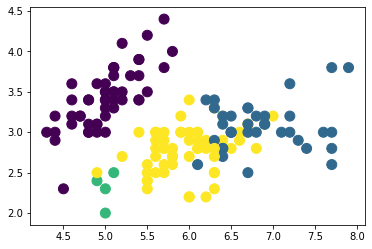

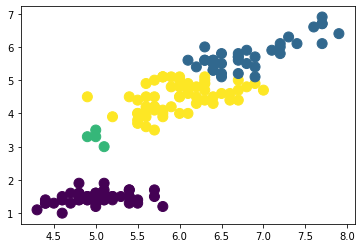

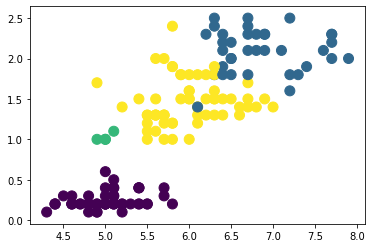

In [82]:
# Repeat clustering on the original Iris dataset
dnew = d
# Build a dendrogram using single-linkage clustering and Euclidean distance
Z = hierarchy.linkage(dnew,method = 'average', metric = 'euclidean')
# Picks 4 clusters
cl = hierarchy.fcluster(Z, 4, criterion='maxclust')
print(crosstab(cl, y, rownames=['cl'], colnames=['y']))

# plotting the first attribute against the other 3
plt.figure()
plt.scatter(d[:,0] , d[:,1], c=cl, s = 100, facecolors='none')
plt.figure()
plt.scatter(d[:,0] , d[:,2], c=cl, s = 100, facecolors='none')
plt.figure()
plt.scatter(d[:,0] , d[:,3], c=cl, s = 100, facecolors='none')

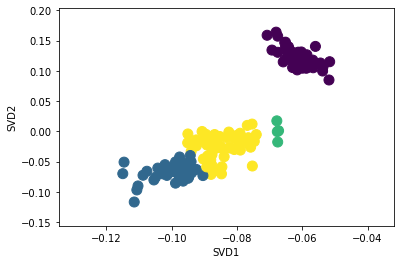

In [83]:
# SVD to transform 4D to 2D with suggestion from this source
# https://www.kaggle.com/leogal/pca-svd-intro-and-visualization
def svd(data, S=2):
     
    #calculate SVD
    U, s, V = np.linalg.svd(data)

    #take out columns you don't need
    newdata = U[:,:S]
    
    plt.figure()
    plt.scatter(newdata[:,0] , newdata[:,1], c=cl, s = 100, facecolors='none')
    plt.xlabel('SVD1')
    plt.ylabel('SVD2')
    plt.show()
    
svd(d, 2)

y    0   1   2
cl            
1   50   0   0
2    0   0  36
3    0  50  14
Purity score is 0.9066666666666666
y    0   1   2
cl            
1   50   0   0
2    0   0   3
3    0  50  47
Purity score is 0.6866666666666666
y    0   1   2
cl            
1   46   0   0
2    0  10   3
3    4  40  47
Purity score is 0.6866666666666666
y    0   1   2
cl            
1   50   0   0
2    0   0  36
3    0  50  14
Purity score is 0.9066666666666666
y    0   1   2
cl            
1   50   0   0
2    0   1  36
3    0  49  14
Purity score is 0.9
y    0   1   2
cl            
1   50   0   0
2    0   0   2
3    0  50  48
Purity score is 0.68
y    0   1   2
cl            
1    0  50  50
2   49   0   0
3    1   0   0
Purity score is 0.6666666666666666
y    0   1   2
cl            
1   50  50  50
Purity score is 0.3333333333333333
y    0   1   2
cl            
1   50   0   0
2    0   0   2
3    0  50  48
Purity score is 0.68
y    0   1   2
cl            
1   50   0   0
2    0  50  49
3    0   0   1
Purity s

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


y    0   1   2
cl            
1   50   0   0
2    0   1  36
3    0   4   0
4    0  45  14
Purity score is 0.9
y    0   1   2
cl            
1   50   0   0
2    0   0   2
3    0  50  47
4    0   0   1
Purity score is 0.6866666666666666
y    0   1   2
cl            
1    0  50  47
2    0   0   3
3   49   0   0
4    1   0   0
Purity score is 0.6866666666666666
y    0   1   2
cl            
1   50  50  50
Purity score is 0.3333333333333333
y    0   1   2
cl            
1   50   0   0
2    0   0   2
3    0  50  47
4    0   0   1
Purity score is 0.6866666666666666
y    0   1   2
cl            
1   50   0   0
2    0  50  48
3    0   0   1
4    0   0   1
Purity score is 0.68
y    0   1   2
cl            
1    0   0  12
2    0  23  37
3    0  27   1
4   50   0   0
Purity score is 0.84
y    0   1   2
cl            
1    0  29  37
2    0   0  11
3    1  21   2
4   49   0   0
Purity score is 0.7866666666666666
y    0   1   2
cl            
1   50  50  50
Purity score is 0.3333333333333333
y    0  

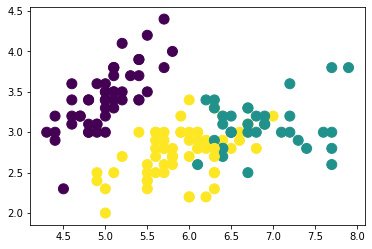

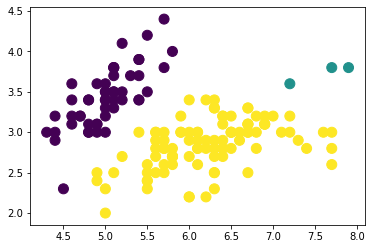

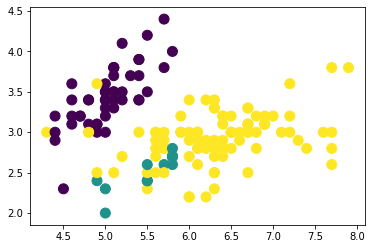

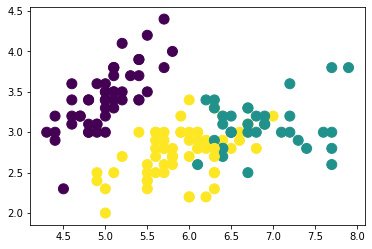

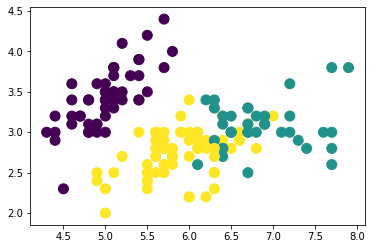

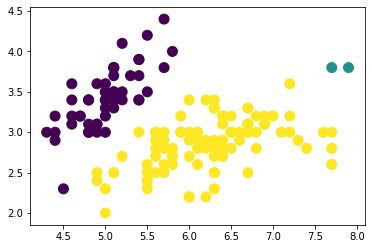

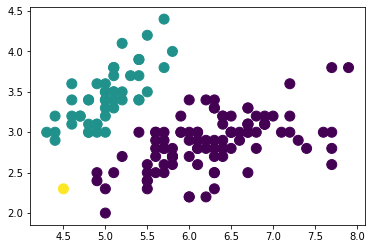

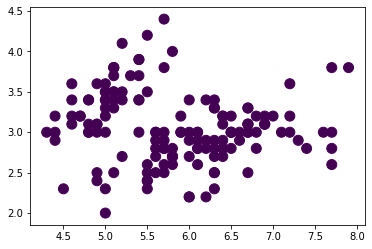

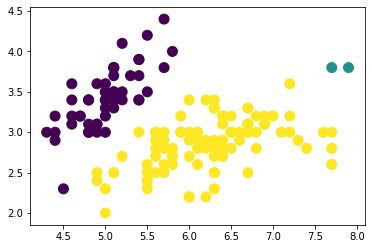

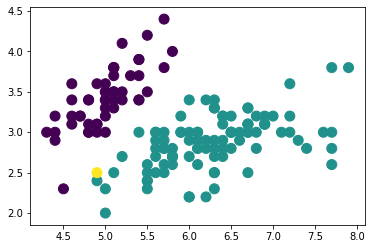

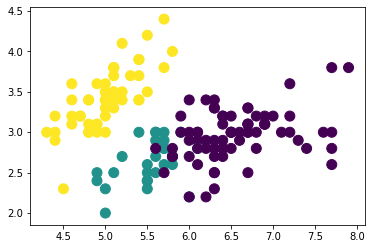

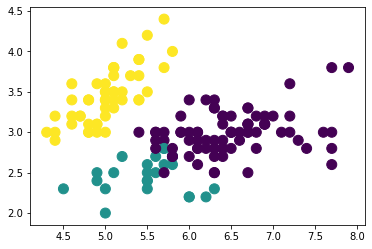

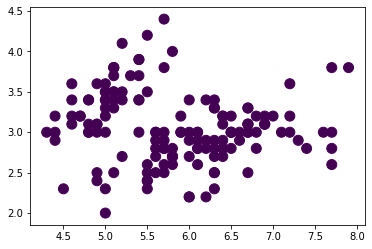

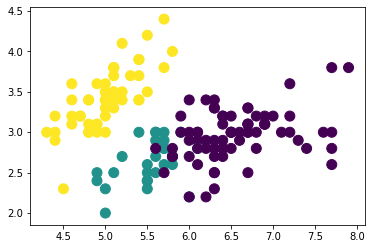

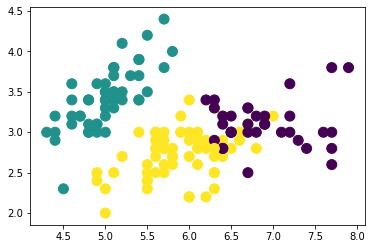

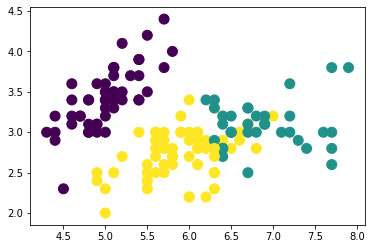

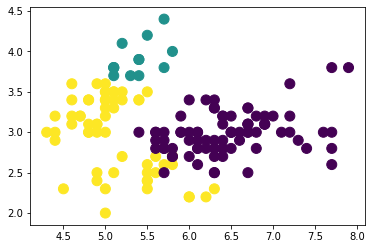

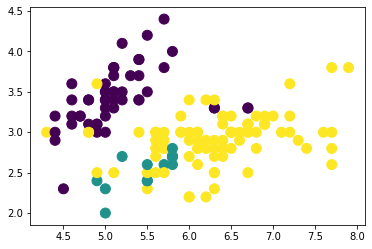

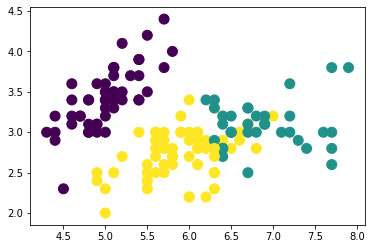

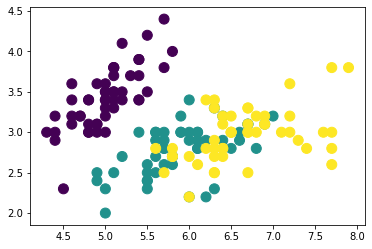

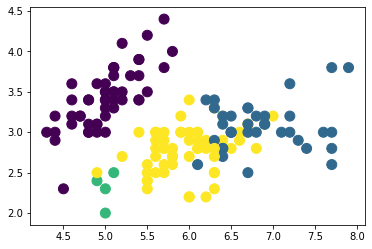

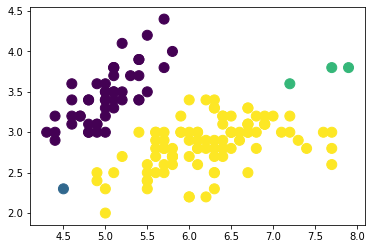

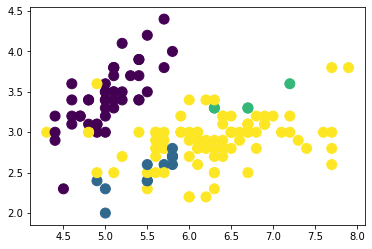

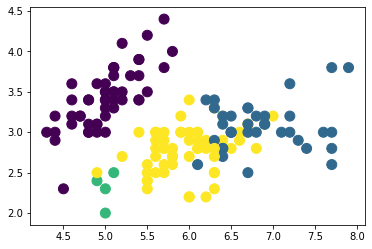

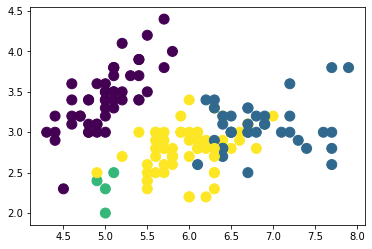

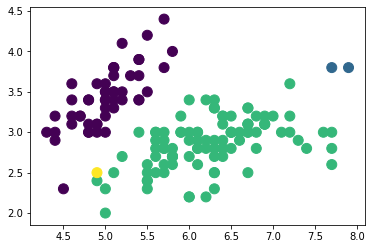

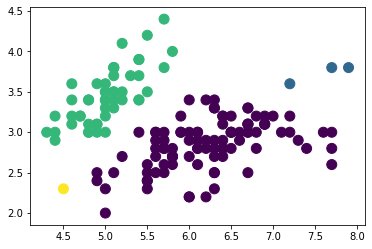

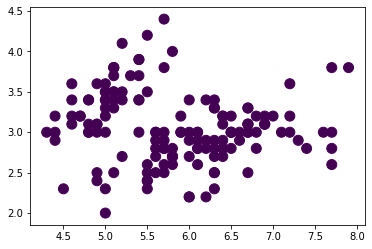

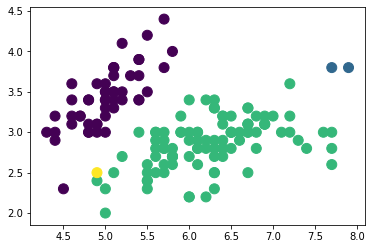

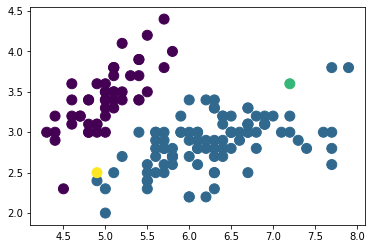

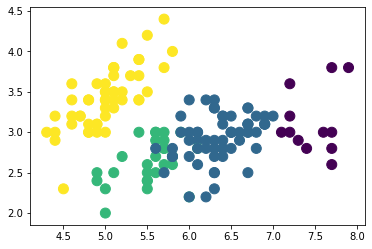

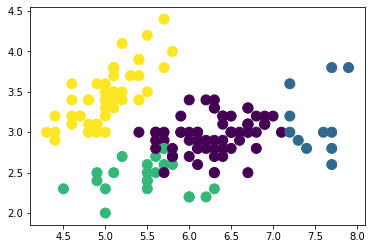

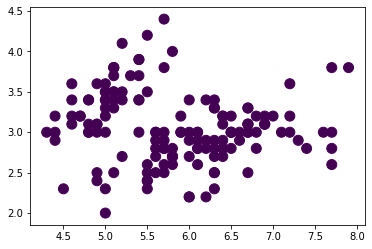

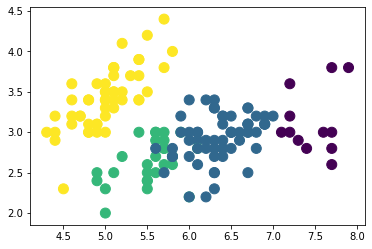

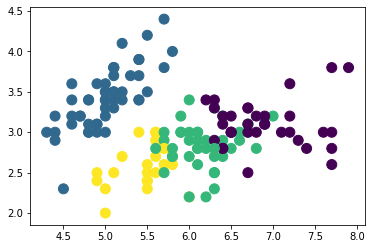

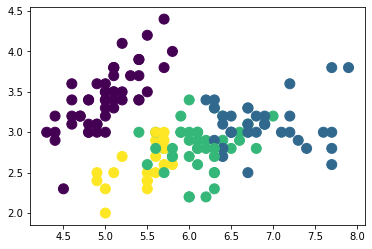

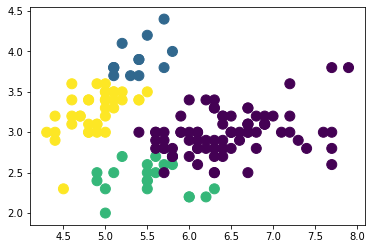

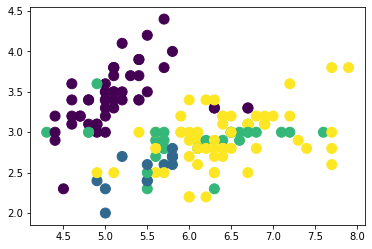

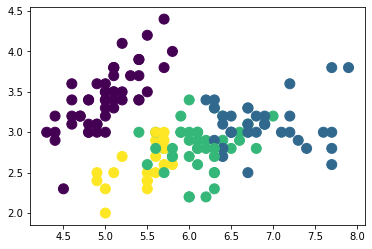

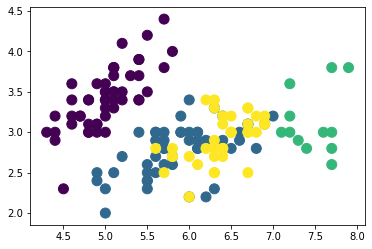

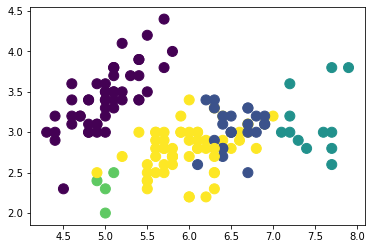

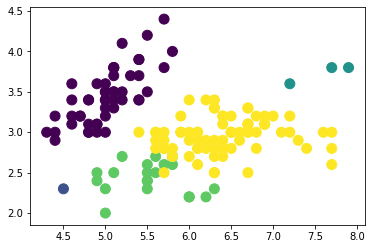

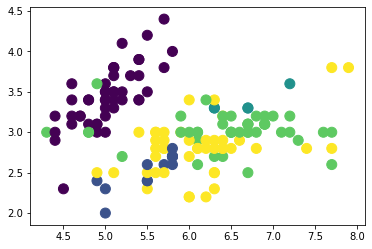

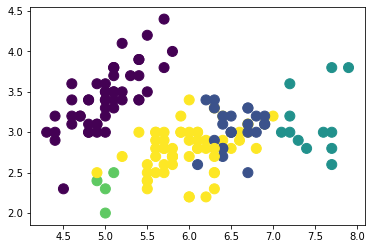

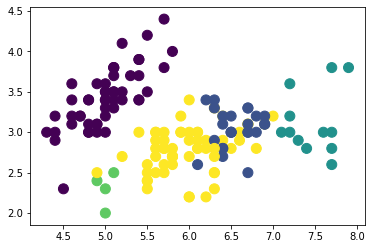

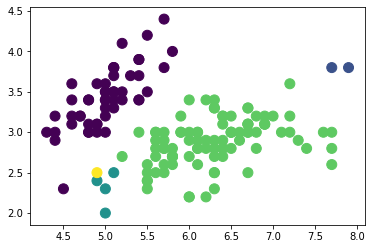

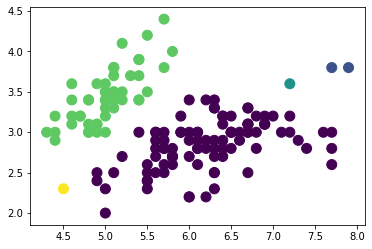

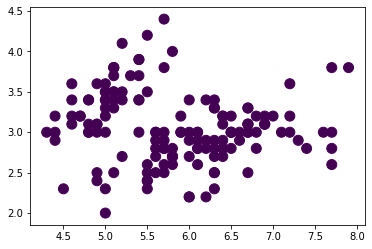

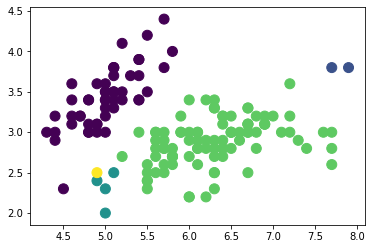

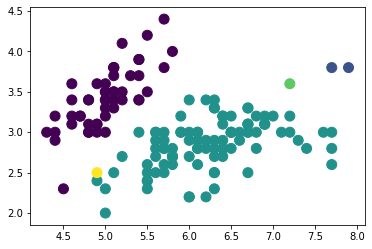

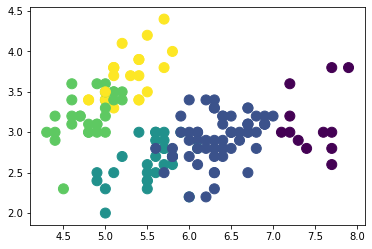

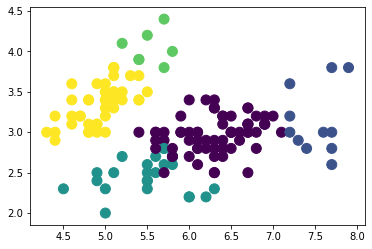

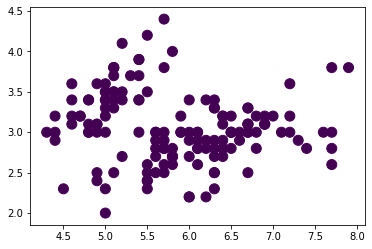

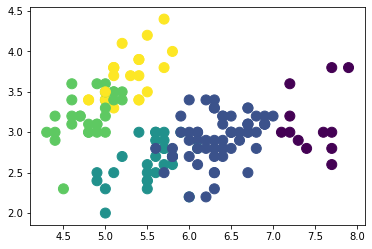

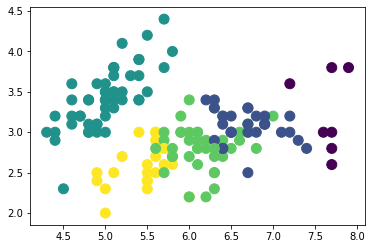

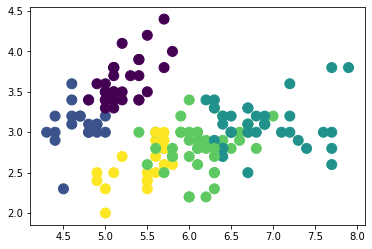

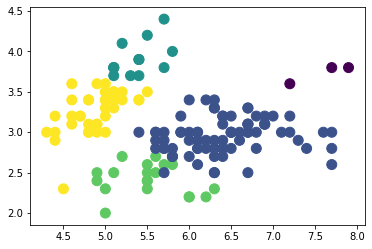

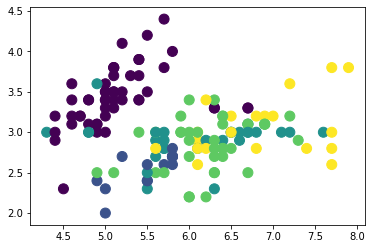

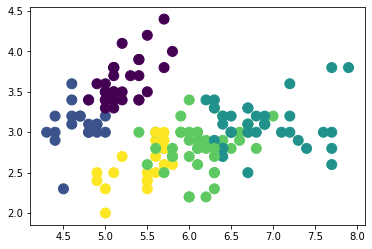

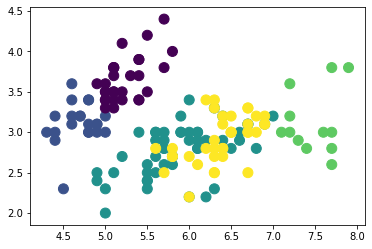

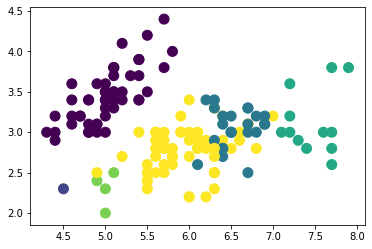

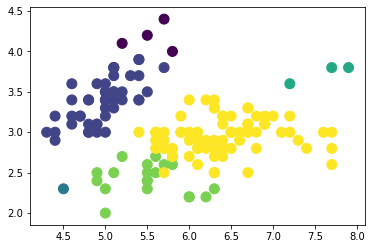

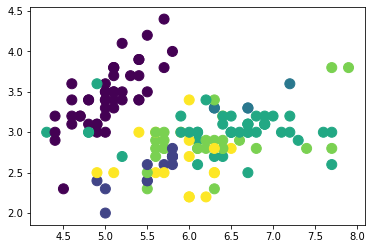

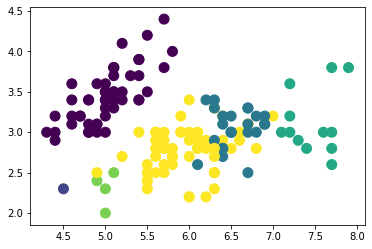

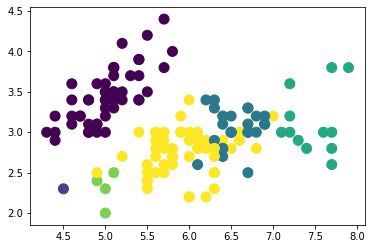

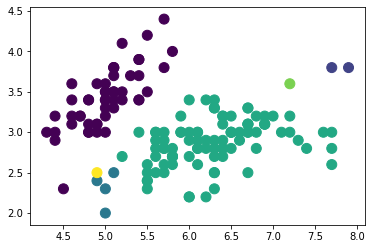

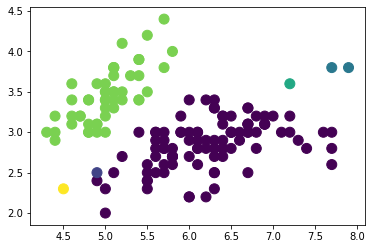

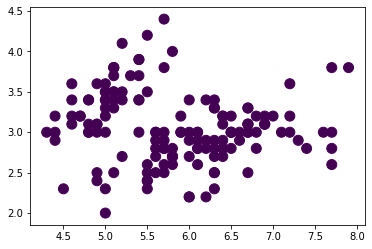

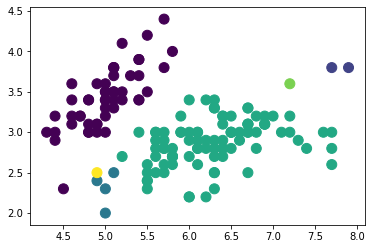

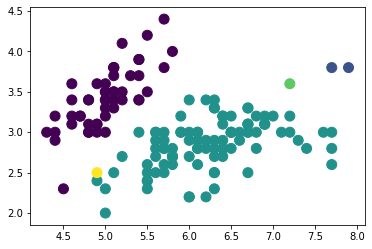

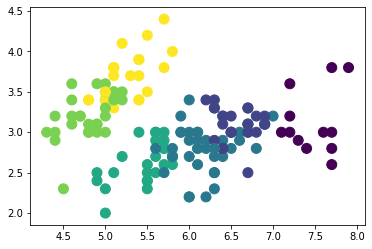

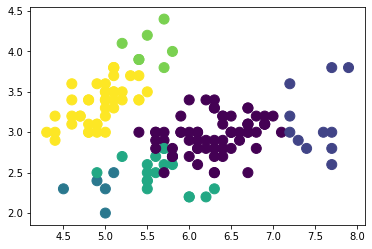

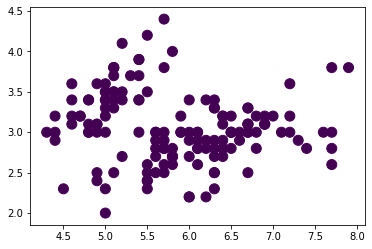

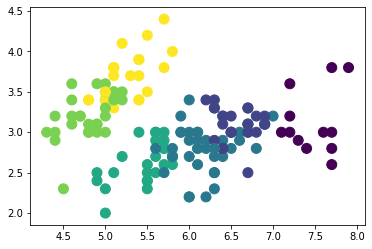

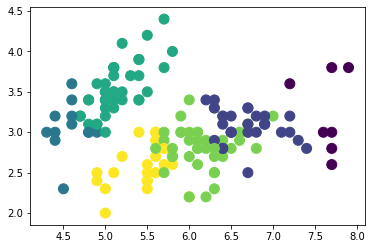

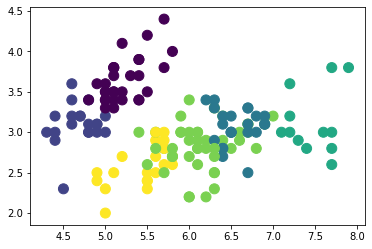

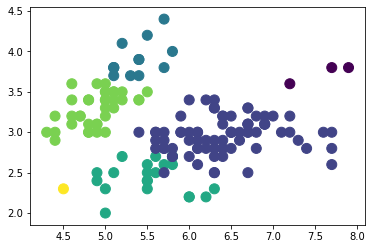

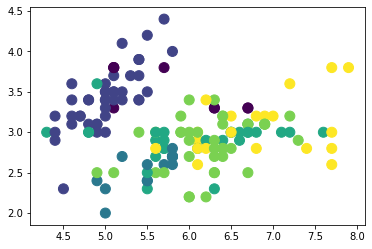

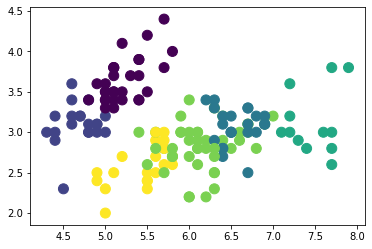

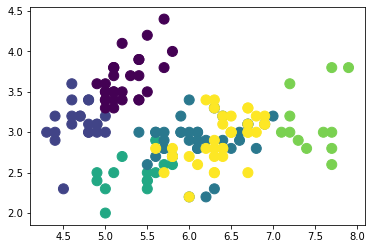

In [84]:
# data might be a dataframe
# containing cross_tabulation data
def purity_calculator(data):
    sum_of_all_vals = data.values.sum()
    
    # df.max(axis=1) returns a dataframe that has a column
    # each entry in that column represents the maximum value of the corresponding
    # row in the original dataset
    sum_of_max_val_each_row = data.max(axis=1).values.sum()
    return sum_of_max_val_each_row / sum_of_all_vals

# create a new function that has cross_tab along with purity calculation
def build_clustering_model(df, num_cluster, method = 'single', metric = 'euclidean', criterion = 'maxclust', \
                          cluster_graph = True, dendrogram = False):
    
    # Build a dendrogram using single-linkage clustering and Euclidean distance
    Z = hierarchy.linkage(df, method = method, metric = metric)
    
    # Picks num_cluster clusters
    cl = hierarchy.fcluster(Z, num_cluster, criterion = criterion)
    
    # Create graph to show clusters
    if cluster_graph:
        plt.figure()
        plt.scatter(df[:,0] , df[:,1], c=cl, s = 100, facecolors='none')
            
    # Create Dendogram
    if dendrogram:
        plt.figure(figsize = (15,4))
        hierarchy.dendrogram(Z);
        
    # get crosstab
    crosstab_data = crosstab(cl, y, rownames=['cl'], colnames=['y'])
    print(crosstab_data)
    
    # calculating purity score
    score = purity_calculator(crosstab_data)
    print('Purity score is {}'.format(score))
    
    return score

# parameter's list
num_cluster_list = [3,4,5,6]
method_list = ['average', 'single', 'complete', 'weighted']
metric_list = ['euclidean','seuclidean', 'jaccard', 'minkowski', 'cityblock']
dict_purity_score = {}

for num_cluster in num_cluster_list:
    for method in method_list:
        for metric in metric_list:
            purity_score = build_clustering_model(d, num_cluster, method = method, metric = metric)
            dict_purity_score[(num_cluster, method, metric)] = purity_score

y    0   1   2
cl            
1   50   0   0
2    0   0  36
3    0  50  14
Purity score is 0.9066666666666666
y    0   1   2
cl            
1   50   0   0
2    0   0  36
3    0   4   0
4    0  46  14
Purity score is 0.9066666666666666
y    0   1   2
cl            
1   49   0   0
2    1   0   0
3    0   0  36
4    0   4   0
5    0  46  14
Purity score is 0.9066666666666666
y    0   1   2
cl            
1   49   0   0
2    1   0   0
3    0   0  24
4    0   0  12
5    0   4   0
6    0  46  14
Purity score is 0.9066666666666666


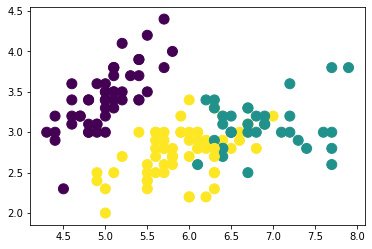

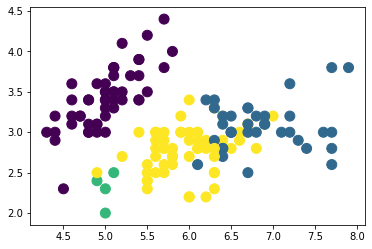

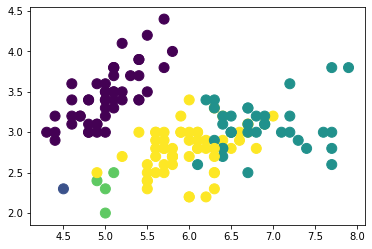

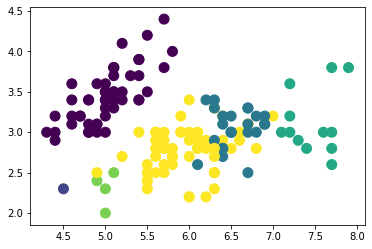

In [85]:
# since method centroid requires metric to be euclidean, I figure I should run it standalone
for num_cluster in num_cluster_list:
    purity_score = build_clustering_model(d, num_cluster, method = 'centroid', metric = 'euclidean')
    dict_purity_score[num_cluster, 'centroid', 'euclidean'] = purity_score

In [86]:
# sorting the keys in dictionary to see which choices
# for  params result in the highest accuracy rate

# sorting the dictionary by values in descending order
sorted_dict = [k for k, v in sorted(dict_purity_score.items(), key=lambda item: item[1], reverse=True)]

# print out the paramaters lists that gave the top 10 accuracy rate
for k in sorted_dict[:20]:
    print("{} with purity score: {}".format(k, dict_purity_score[k]))

(3, 'weighted', 'cityblock') with purity score: 0.9533333333333334
(4, 'weighted', 'cityblock') with purity score: 0.9533333333333334
(5, 'weighted', 'cityblock') with purity score: 0.9533333333333334
(6, 'weighted', 'cityblock') with purity score: 0.9533333333333334
(3, 'average', 'euclidean') with purity score: 0.9066666666666666
(3, 'average', 'minkowski') with purity score: 0.9066666666666666
(4, 'average', 'euclidean') with purity score: 0.9066666666666666
(4, 'average', 'minkowski') with purity score: 0.9066666666666666
(5, 'average', 'euclidean') with purity score: 0.9066666666666666
(5, 'average', 'minkowski') with purity score: 0.9066666666666666
(6, 'average', 'euclidean') with purity score: 0.9066666666666666
(6, 'average', 'minkowski') with purity score: 0.9066666666666666
(3, 'centroid', 'euclidean') with purity score: 0.9066666666666666
(4, 'centroid', 'euclidean') with purity score: 0.9066666666666666
(5, 'centroid', 'euclidean') with purity score: 0.9066666666666666
(6,

From our observation, it seems like the highest achievable purity score are 0.953, which all used weighted method and city block distance. There were some other parameter choices that achieved 0.9066 score which seems to use the average or centroid method.

## K-Means Clustering

K-means clustering is another clustering algorithm (we will cover it in class tomorrow). It still receives a data set as an input, as well as the desired number of clusters, and outputs the assignment of data points to clusters.

Let us illustrate how to use k-means on the iris data.

y    0   1   2
cl            
0    0   4  28
1   50   0   0
2    0   0  19
3    0  16   0
4    0  30   3


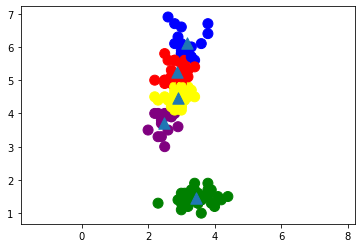

In [90]:
# redefined dnew back to the original dnew
dnew = d[:,1:3]

# the following command results in creating of 5 clusters of `dnew` data
kmeans = KMeans(n_clusters=5, random_state=0).fit(dnew)
# cl are the assignments of points to one of the 5 clusters
cl=kmeans.labels_
# cen are the centers of the 5 clusters, obtained by finding the average of all examples assigned to the clusters
cen=kmeans.cluster_centers_
# plot the results
colors=['red','green','blue','purple','yellow']
plt.figure()
plt.scatter(dnew[:,0],dnew[:,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
plt.scatter(cen[:,0],cen[:,1],s=130, marker="^")
plt.axis('equal')

# cross-tabulation with the flower types
print(crosstab(cl, y, rownames=['cl'], colnames=['y']))

**Question 7**. Discuss on the quality of outcome of k-means clustering

**Question 8**. Repeat k-means clustering, but this time change the nnumber of clusters to 3. Discuss the results. Compare the results with the results of hierarchical clustering from **Question 4**.

**Question 9**. Repeat k-means clustering on the whole Iris data set, the same as you did in **Question 6**. Discuss your results and compare them to the hierarchical clustering results.

**Answer 7:**
When looking at the cross tabulation result, the model does very well in grouping those that are in class 0 together but not so much for class 1 and 2. When looking at the visualization, you can see all of those that are in class 1 are in the green blob and then for the upper blob with 4 different colors, you can see it has 4 different clusters but these 4 clusters are continuous without blending around or having a point that are seems to blend in with another cluster so in regards to the boundary of each cluster, I would consider this as good. 

**Answer 8:**

y    0   1   2
cl            
0   50   0   0
1    0   2  41
2    0  48   9


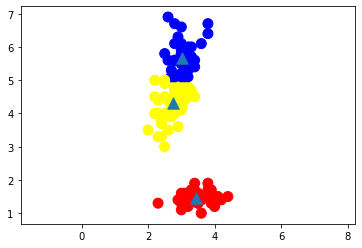

In [91]:
# the following command results in creating of 3 clusters of `dnew` data
kmeans = KMeans(n_clusters=3, random_state=0).fit(dnew)
# cl are the assignments of points to one of the 5 clusters
cl=kmeans.labels_
# cen are the centers of the 5 clusters, obtained by finding the average of all examples assigned to the clusters
cen=kmeans.cluster_centers_
# plot the results
colors=['red','green','blue','purple','yellow']
plt.figure()
plt.scatter(dnew[:,0],dnew[:,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
plt.scatter(cen[:,0],cen[:,1],s=130, marker="^")
plt.axis('equal')

# cross-tabulation with the flower types
print(crosstab(cl, y, rownames=['cl'], colnames=['y']))

When comparing this KMeans model to the Hierarchical model in question 4, this model definitely outperforms due to the level of class purity. If one looks at the cross tabulation table, it is obvious that this model does a very good job at grouping those in class 0, 1 and 2 together while for the model in question 4, it does not do a group job at grouping those that are in class 2 (due to the 31-19 splits between cluster 2 and 3 as showed in the cross tabulation table). 

**Answer 9:**

y    0   1   2
cl            
0    0  48  14
1   50   0   0
2    0   2  36


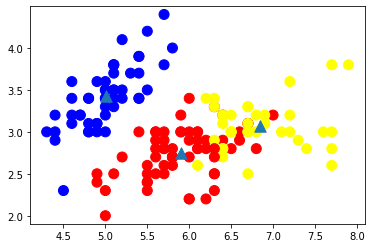

In [95]:
# the following command results in creating of 4 clusters of `dnew` data
kmeans = KMeans(n_clusters=3, random_state=0).fit(d)
# cl are the assignments of points to one of the 5 clusters
cl=kmeans.labels_
# cen are the centers of the 5 clusters, obtained by finding the average of all examples assigned to the clusters
cen=kmeans.cluster_centers_
# plot the results
colors=['red','green','blue','purple','yellow']
plt.figure()
plt.scatter(d[:,0],d[:,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
plt.scatter(cen[:,0],cen[:,1],s=130, marker="^")
plt.axis('equal')

# cross-tabulation with the flower types
print(crosstab(cl, y, rownames=['cl'], colnames=['y']))

In [98]:
np.mean(list(dict_purity_score.values()))

0.7671428571428571

From cross-tab result, the purity score is around 0.893, which is way better than the average of all the purity score from all the hierarchical models, which is 0.76.

## Lab 9.B Document Clustering (50% of grade)

In this part of the lab assignment, you will apply your clustering knowledge on the Newsgroup data. The following is a list of questions.

1. Select $N = 100$ random documents and their types from the newsgroup data. Use Google search to figure out how to do it in Python. The reason we are doing this is that hierrchical clustering can be very slow on large data sets.

2. Find 3 clusters using deafult (single-link, Eucliedan distance) hierarchical clustering. Use cross-tabulation to measure the quality of clustering.

3. Repeat step 2, by trying to find a better choice of parameters for hierarchical clustering. Try the Jaccard or cosine distance instead of Eucliedean. Report on your findings

4. Repeat step 3, but this type use k-means clustering. Compare with the results from step 3.

5. Instead of $N = 100$, select $N= 200, 500, 1000, 2000, 5000$ random documents. Set number of clusters to 5. Apply hierarchical and k-means clustering on such data and measure time. Discuss how does the time scale with $N$. For k-means clustering, discuss how do the clusters centers change as the data size increases -- do you see some qualitative improvements in the quality of clustering?

### Newsgroups data

Download `documents.csv`, `newsgroup.csv`, `groupnames.csv`, `wordlist.csv` to your local folder. This data set is about 16,242 news articles. Each article is represented as a bag-of-word vector containing counts of 100 words from a dictionary. This is saved in `documents`. The dictionary words are represented in the `wordlist`. Each document belongs to one of the 4 types of articles, listed in `groupnames`. We know the assignment of each document to one of those groups based on `newsgroup` values.

In [182]:
wordlist = np.loadtxt('wordlist.csv', delimiter=",",dtype='str')
documents = np.loadtxt('documents.csv', delimiter=",",dtype='int')
documents = np.transpose(documents)
newsgroup = np.loadtxt('newsgroup.csv', delimiter=",",dtype='int')
groupnames = np.loadtxt('groupnames.csv', delimiter=",",dtype='str')

In [183]:
print(wordlist.shape)
print(documents.shape)
print(groupnames)
print(newsgroup.shape)

(100,)
(16242, 100)
['comp.*' 'rec.*' 'sci.*' 'talk.*']
(16242,)


In [184]:
print(np.unique(documents))

[0 1]


**Step 1:**

Since 0 and 1 are unique values of the documents.csv file, we can conclude that 0 is if a word does not exist in a document and 1 is if a word does exist. 

Initially, I thought this tabulates the frequency of each word from the wordlist in each document but it does not seem to be the case here since the unique values are 0 and 1. 

In [185]:
# Extract 100 random docs and their types
# This should be applied on documents and newsgroup

# before extracting the data, we need to know whether documents and newsgroup are of
# Pandas's DataFrame or Numpy Array data type
print('documents are of type: {}'.format(type(documents)))
print('newsgroup are of type: {}'.format(type(newsgroup)))

documents are of type: <class 'numpy.ndarray'>
newsgroup are of type: <class 'numpy.ndarray'>


Both are of Numpy Array type so we can either convert them to DataFrames or perform numpy built-in methods to extract the data and then turn them into DataFrames. 

Since we are going to perform analysis and build models later, it is better to turn them into DataFrame now.

In [186]:
#documents = pd.DataFrame(documents, columns=wordlist)
#documents.head(5)

In [187]:
#newsgroup = pd.DataFrame(newsgroup)
#newsgroup.shape

The above code verified that newsgroup as a DataFrame has a dimension such that it is a column vector.

In [188]:
# randomly choose 100 different indices in the range from 0 -> 16241
chosen_idx = np.random.choice(range(16242), 100, replace=False)

# can think of this as 100 examples with 100 attributes
rand_docs_100 = documents[chosen_idx]

# can think of this as 100 labels
rand_docs_100_types = newsgroup[chosen_idx]
rand_docs_100

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [189]:
#rand_docs_100.head(5)

In [190]:
#rand_docs_100_types.head(5)

Verified that both rand_docs_100 and rand_docs_100_types have the same randomly chosen indicies. 

**Step 2:**

In [191]:
# Build a dendrogram using single-linkage clustering and Euclidean distance
Z = hierarchy.linkage(rand_docs_100, method = 'single', metric = 'euclidean')
    
# Picks num_cluster clusters
cl = hierarchy.fcluster(Z, 3, criterion = 'maxclust')
    
# since docs are classified as 1,2,3,4
y = rand_docs_100_types

print(crosstab(cl, y, rownames=['cl'], colnames=['y']))

y    1   2   3   4
cl                
1   23  20  20  36
2    0   0   0   1


**Step 3:**

In [196]:
Z = hierarchy.linkage(rand_docs_100, method = 'single', metric = 'jaccard')
    
# Picks num_cluster clusters
cl = hierarchy.fcluster(Z, 3, criterion = 'maxclust')
    
# since docs are classified as 1,2,3,4
y = rand_docs_100_types

print(crosstab(cl, y, rownames=['cl'], colnames=['y']))
print(purity_calculator(crosstab(cl, y, rownames=['cl'], colnames=['y'])))

y    1   2   3   4
cl                
1   23  20  18  37
2    0   0   1   0
3    0   0   1   0
0.39


In [197]:
Z = hierarchy.linkage(rand_docs_100, method = 'single', metric = 'cos')
    
# Picks num_cluster clusters
cl = hierarchy.fcluster(Z, 3, criterion = 'maxclust')
    
# since docs are classified as 1,2,3,4
y = rand_docs_100_types

print(crosstab(cl, y, rownames=['cl'], colnames=['y']))
print(purity_calculator(crosstab(cl, y, rownames=['cl'], colnames=['y'])))

y    1   2   3   4
cl                
1   23  20  18  37
2    0   0   1   0
3    0   0   1   0
0.39


From my observation, it seems like trying with different metric does not improve the purity score by anything.

**Step 4:**

y    1   2   3   4
cl                
0    1   0   0  18
1   20  20  18  18
2    2   0   2   1


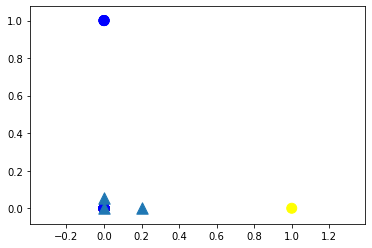

In [198]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(rand_docs_100)
# cl are the assignments of points to one of the 5 clusters
cl=kmeans.labels_
# cen are the centers of the 5 clusters, obtained by finding the average of all examples assigned to the clusters
cen=kmeans.cluster_centers_
# plot the results
colors=['red','green','blue','purple','yellow']
plt.figure()
plt.scatter(rand_docs_100[:,0],rand_docs_100[:,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
plt.scatter(cen[:,0],cen[:,1],s=130, marker="^")
plt.axis('equal')

# cross-tabulation with the flower types
print(crosstab(cl, y, rownames=['cl'], colnames=['y']))

In [195]:
purity_calculator(crosstab(cl, y, rownames=['cl'], colnames=['y']))

0.4

Purity score improved by 0.01.

------------------------------
Purity score for hierarchial: 0.38
Purity score for k-means: 0.515
------------------------------
Purity score for hierarchial: 0.356
Purity score for k-means: 0.458
------------------------------
Purity score for hierarchial: 0.334
Purity score for k-means: 0.448
------------------------------
Purity score for hierarchial: 0.3575
Purity score for k-means: 0.499
------------------------------
Purity score for hierarchial: 0.3382
Purity score for k-means: 0.451


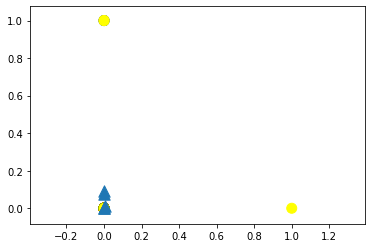

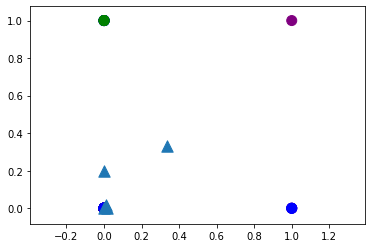

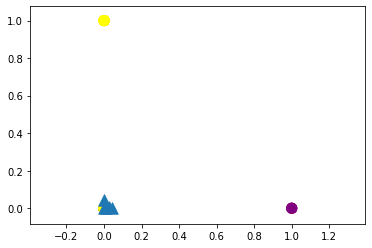

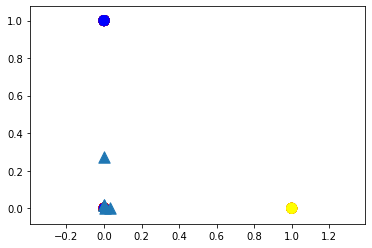

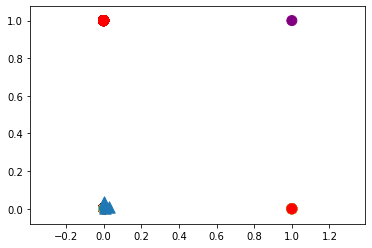

In [204]:
num_cluster = 5
num_doc_list = [200, 500, 1000, 2000, 5000]

for numb_doc in num_doc_list:
    print('-' * 30)
    
    # randomly selecting numb_doc 
    chosen_idx = np.random.choice(range(16242), numb_doc, replace=False)

    rand_docs_n = documents[chosen_idx]
    rand_docs_n_types = newsgroup[chosen_idx]
    
    # hierachial clustering model
    
    Z = hierarchy.linkage(rand_docs_n, method = 'single', metric = 'euclidean')
    # Picks num_cluster clusters
    cl = hierarchy.fcluster(Z, 3, criterion = 'maxclust')
    # since docs are classified as 1,2,3,4
    y = rand_docs_n_types
    
    # purity score calculation for hierarchial 
    print("Purity score for hierarchial: {}".format(purity_calculator(crosstab(cl, y, rownames=['cl'], colnames=['y']))))
    
    # k-means clustering model
    
    kmeans = KMeans(n_clusters=num_cluster, random_state=0).fit(rand_docs_n)
    
    # cl are the assignments of points to one of the 5 clusters
    cl=kmeans.labels_
    # cen are the centers of the 5 clusters, obtained by finding the average of all examples assigned to the clusters
    cen=kmeans.cluster_centers_
    # plot the results
    colors=['red','green','blue','purple','yellow']
    plt.figure()
    plt.scatter(rand_docs_n[:,0],rand_docs_n[:,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
    plt.scatter(cen[:,0],cen[:,1],s=130, marker="^")
    plt.axis('equal')

    # purity score calculation for k-means
    print("Purity score for k-means: {}".format(purity_calculator(crosstab(cl, y, rownames=['cl'], colnames=['y']))))

For hierachial clustering, the time scales n^3 because n^2 for scanning the distance matrix and n for updating it while for k-means, the time scales n, linearly, O(n * k * I * d), where n = # data points, k = # of clusters, I = # of iterations, d = # of attributes.

For k-means clustering, the clusters centers start to concentrate down to the bottom left corner as the number of documents increases. 